# Sendy Logistics Regression Model.

![Image of Yaktocat](https://cdn1.vc4a.com/media/2015/12/Sendy-delivery-900x322.jpg)

## Introduction
Logistics is fundamental to the success of a business while efficient and affordable logistics are a vital component of economic development. Like any logistics company, Sendy aims to improve the efficiency of businesses by providing faster delivery of their products.

### About Sendy:
Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. It was headquartered in Kenya and has gradually expanded across the country and East African borders where  the it is enabling businesses to move large volumes of goods.

### Aim and objectives:
The aim of this notebook is to help Sendy improve their logistics and communicate an accurate arrival time to their customers. This is done through building a prediction model that estimates time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. The model will enhance customer communication and improve the reliability of Sendy's services; which will ultimately improve customer experience. In addition, the solution from the model will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

## Importing the libraries

In [519]:
import numpy as np 
import math
# data processing
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree

#Varrible selection
from statsmodels.graphics.correlation import plot_corr
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

!pip install plotnine
from plotnine import *
%matplotlib inline

## Getting the data
The csv files are read into pandas dataframe and are renamed.

In [418]:
Train_df= pd.read_csv("Train.csv")
Test_df= pd.read_csv("Test.csv")
Riders_df= pd.read_csv("Riders.csv")
VariableDefinitions_df= pd.read_csv("VariableDefinitions.csv")
SampleSubmission_df= pd.read_csv("SampleSubmission.csv")

## Data description

Exploring datasets helps with developing a deep understanding about the data. Before starting with the description of data, from the csv files one can easily notice that the data is already split into train and test sets. Therefore these sets wil be explored individually. 

To know what data this notebook will be dealing with, the Variable_Definations_df dataframe is called below to display the names of the features contained in all the dataframes and their descriptions.

In [419]:
VariableDefinitions_df

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


The VariableDefinitions_df shows that there is a total of 34 feartures in all the data frames, with a missing decripction for Rider metrics. A look at Train_df dataframe is taken to check the number of null and non-null entries in all the features as well as types in each.

In [420]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

The Train_df has 21201 entries in 28 features + the target variable (Time from Pickup to Arrival). Six of the features are floats, 13 are integers and 10 are objects. A close look at the data contained in the Train_df is done below.

In [421]:
Train_df.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


From the Train_df dataframe, some of the features need to be converted into numeric ones, so that the machine learning algorithms can process them. Furthermore, features containing missing values (NaN = not a number) can also be spoted, which will be dealt with at a later stage. 

The Test_df is now looked at to check and confirm if it contains the same features as the Train_df. This will be done by first checking the number of null, non-null values and data types as done for Train_df.

In [422]:
Test_df.info()
Test_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26


This dataframe contains a total of 7068 entries with some entries missing in Temperature and Precipitation in millimeters features. The data types contained in it are the same as the ones in Train_df. The above reveals that instead of the Test_df dataframe containing a total of 29 columns like the Train_df, it only contains 25 columns. This will be looked at a later stage and solved.

The Riders_df datframe is also looked at for the same reasons as the ones in Train_df and Test_df above.

In [423]:
Riders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 33.8+ KB


Rider_df displays the information about the motorbike riders. It consist of five features with 960 entries and no null entries. A dataframe for Riders_df can be seen below.

In [424]:
Riders_df.head(8)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156
5,Rider_Id_720,2608,1798,13.2,504
6,Rider_Id_95,3464,1304,13.4,950
7,Rider_Id_122,4831,2124,14.1,1469


From the dataframe,  it can be seen that the feature (Rider Id) is common to Riders_df and Train_df and Test_df dataframes. This will allows for a merge of the data frames. A look at the SampleSubmission_df dataframe is taken below.

In [425]:
SampleSubmission_df.head(8)

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
5,Order_No_14573,NaN
6,Order_No_6731,NaN
7,Order_No_18436,NaN


The sample submission displays the format in which sumbmision would be made for this predict on Zindi.

## Data preprocessing
The data preprocessing section deals with cleaning and transfroming raw data into a format that is understandable.

### Data cleaning and formating
Since it was discovered before that Train_df and Test_df both have a feature that is also there in Riders Id, they are both merged with the Riders_df. Below is the merging of both dataframes to the Raiders_df dataframe using the common column 'Raider Id'.

In [426]:
Train_df = pd.merge(Train_df, Riders_df, left_on='Rider Id', 
                    right_on='Rider Id', how='left')
Test_df = pd.merge(Test_df, Riders_df, left_on='Rider Id',
                    right_on='Rider Id', how='left')

Test_df and Train_df dataframes are merged with Riders_df dataframe because the features in the Rider_df dataframe have information that is believed to have influence on the predict variable. The merged dataframes are displayed below.

In [427]:
Train_df.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114


In [428]:
Test_df.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67


The dataframes have increased in the number of columns to show that they have been merged. The Rider Id, Vehicle Type and User Id features are looked at and unique entries in each are counted.

In [429]:
print('There are', Train_df['Rider Id'].nunique(), 
      'motorbike riders,', Train_df['Vehicle Type'].nunique(), 'types of vehicles and', Train_df['User Id'].nunique(), 
      'Customers')

There are 924 motorbike riders, 1 types of vehicles and 3186 Customers


Since there is only one type of vehicle the Vehicle Type feature is dropped as it will not be of help. The User Id, Rider Id and Order numbers will be dropped as they will have no influence of the prediction of the target variable. For the Test_df, the Oder number will not be dropped for Zendy submission purposes. 

It is noticeable that the labeling format is not consistant in the dataframe features, therefore underscores will be use instead of spaces. Below the replacement is performed.

In [430]:
#Formatting the naming of the columns.
Train_df.columns = Train_df.columns.str.replace(' ', '_')
Test_df.columns = Test_df .columns.str.replace(' ', '_')

#Removing "-" from the feature labels.
Train_df.columns = Train_df.columns.str.replace('_-_', '_')
Test_df.columns = Test_df .columns.str.replace('_-_', '_')

Below is to check if the feature headings are consistent.

In [431]:
Train_df.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Arrival_at_Destination_Day_of_Month',
       'Arrival_at_Destination_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [432]:
Test_df.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

The hyphens and spaces are now replaced with the underscores and the column names are now showing consistency. 

One of the missing features in Test_df dataframe is the 'Arrival at Destination Times' and this will be dropped in the Train_df along with other features that were identified before to be less helpful.

In [433]:
Train_df = Train_df.drop(['Vehicle_Type', 
                          'Arrival_at_Destination_Day_of_Month',
                          'Arrival_at_Destination_Weekday_(Mo_=_1)',
                          'Arrival_at_Destination_Time','Order_No', 'User_Id', 'Vehicle_Type', 'Rider_Id'], axis = 1)
Test_df = Test_df.drop(['Vehicle_Type','Order_No', 'User_Id', 'Vehicle_Type','Rider_Id'], axis = 1)

Then the Train_df and Test_df dataframes are checked to see if the columns are dropped.

In [434]:
Train_df.columns

Index(['Platform_Type', 'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [435]:
Test_df.columns

Index(['Platform_Type', 'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo_=_1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo_=_1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo_=_1)', 'Pickup_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

Train_df and Test_df columns above show that the unwanted columns have been dropped. Since all the unnecessary columns are dealt with the dataframes can be checked for missing values.

### Handling missing data

The Train_df is assessed for missing data. This is done by creating a new dataframe containing all the features in the Train_df and the counts of missing data in each feature. This is shown below.

In [436]:
total = Train_df.isnull().sum().sort_values(ascending=False)
percent_1 = Train_df.isnull().sum()/Train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Precipitation_in_millimeters,20649,97.4
Temperature,4366,20.6
No_of_Ratings,0,0.0
Pickup_Day_of_Month,0,0.0
Personal_or_Business,0,0.0


From the created dataframe called missing_data, a figure is produced to give a visual showing the missing data in each feature.

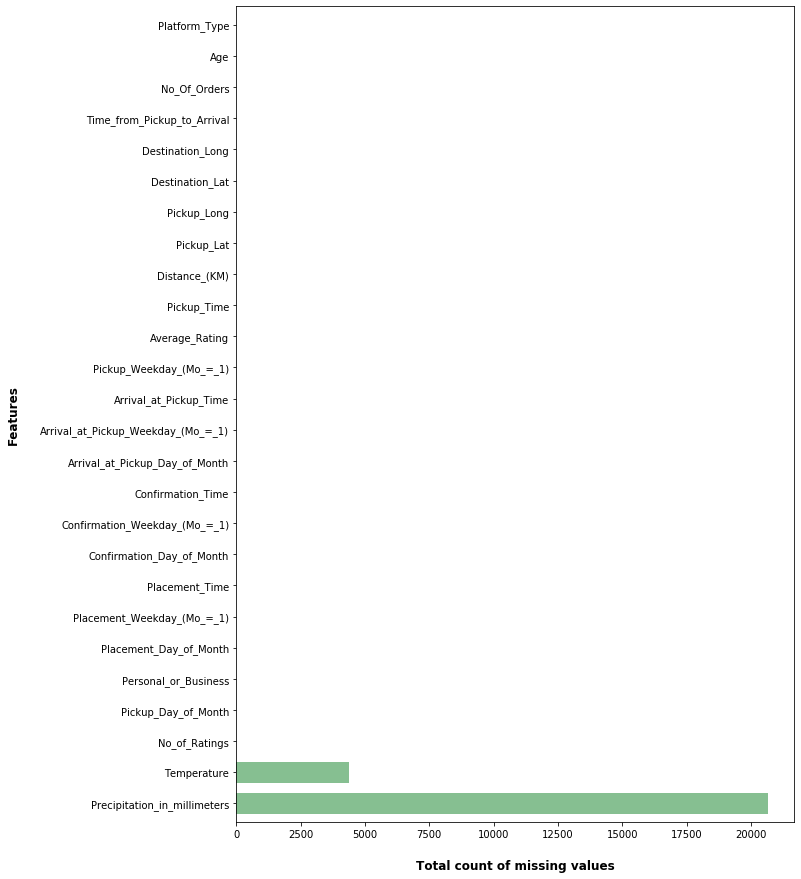

In [437]:
ax = missing_data['Total'].plot(kind='barh', figsize=(10, 15), color='#86bf91', zorder=2, width=0.68)
    # Set x-axis label
ax.set_xlabel("Total count of missing values", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Features", labelpad=20, weight='bold', size=12)
plt.show()

As observed from both missing_data frame and the visual display above, it will be a bit tricky to deal with the 'Temparature' feature, which has 4366 missing values. On the other hand, the 'Precipitation in mm' feature needs further investigation it has 97.4 % of its data missing. There is higher possibility that the missing 'Precipitation in mm' can be because of no measurment taken when there was no precipitation, which means the missing values can be filled or replaced with zeros.

__Investigating on Precipitation in millimeter feature.__

'Precipitation in mm' feature is checked if it contains any 0 mm records of Precipitation from both Test_df and Train_df dataframes.

In [438]:
(Train_df['Precipitation_in_millimeters']==0).all(),(Test_df['Precipitation_in_millimeters']==0).all()


(False, False)

The are no recorded 0 mm values for precipitation in both of the dataframes. It is not likely that pricipitation may occur in all days of the month. It makes sense that 97% of the time in a month there is no precipitation, therefore the NaN values will be replaced with 0 values. This means that on those days there was no precipitation and therefore none was recorded.

In [439]:
Train_df["Precipitation_in_millimeters"] = Train_df["Precipitation_in_millimeters"].fillna(0)
Test_df["Precipitation_in_millimeters"] = Test_df["Precipitation_in_millimeters"].fillna(0)

__Investigating on Temperatue feature.__

Checking for relationship between Temparature and features which may have an influence on Time from Pickup to Arrival. Temperature for both personal and business orders in all platformed are looked at for any relationships.

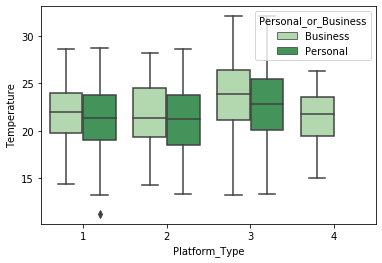

In [440]:
#Train_df data set 
Temp = sns.boxplot(x="Platform_Type", y="Temperature", hue="Personal_or_Business",
                 data=Train_df, palette="Greens")


The whisker and the box diagram shows that there is a relationship between the Temparature, Platform Type, as well as the Personal or bussiness feature. It is clear that temperatures in all the platforms for both business and personal orders have a mean that is between 20 and 25. The missing data is then replaced by mean of the non-null values. This will only affect Temperature as at this point it is the only feature with null values.

In [441]:
Train_df = Train_df.fillna(Train_df.mean())
Test_df = Test_df.fillna(Test_df.mean())

Since all the null entries are dealt with, the next step is to look at formating the data types to the ones one can perform calculation on, and which the model can easily work with.

### Data type formating

There are four features containg time data but as an object:

- Placement_Time
- Confirmation - Time
- Arrival_at_Pickup_Time
- Pickup_Time

A function that takes time in hours: minutes: seconds format to seconds is created, and that time in both the dataframes is is converted to seconds. 

In [442]:
def alter_time(df):
    time_matrix = ['Placement_Time','Confirmation_Time', 
                   'Arrival_at_Pickup_Time', 'Pickup_Time']
    for i in time_matrix:
        df[i] = pd.to_datetime(df[i]).dt.strftime('%H:%M:%S')
        df[i] = pd.to_timedelta(df[i])
        df[i] = df[i].dt.total_seconds()
        
    return df

In [443]:
Train_df = alter_time(Train_df)
Test_df = alter_time(Test_df)

In [444]:
Train_df.head(2)

,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,34546.0,9,5,34810.0,9,5,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,12,5,40576.0,12,5,41001.0,12,5,...,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69


## Feature engineering

In this section new time features are created from calculating the difference between the existing features. The feature that will be used are as follow:
- Placement_Time
- Confirmation - Time
- Arrival_at_Pickup_Time
- Pickup_Time

From the listed features, the following new features are created:
- Placement_to_Confiration_Time
- Placement_to_Arrival_at_Pickup_Time
- Placement_to_Pickup_Time
- Confirmation_to_Arrival_at_Pickup_Time
- Confirmation_to_Pickup_Time
- Arrival_at_Pickup_to_Pickup_Time

In [445]:
Train_df['Placement_to_Confiration_Time'] = Train_df['Confirmation_Time'] - Train_df['Placement_Time']
Test_df['Placement_to_Confiration_Time'] = Test_df['Confirmation_Time'] - Test_df['Placement_Time'] 

Train_df['Placement_to_Arrival_at_Pickup_Time'] = Train_df['Arrival_at_Pickup_Time'] - Train_df['Placement_Time']
Test_df['Placement_to_Arrival_at_Pickup_Time'] = Test_df['Arrival_at_Pickup_Time'] - Test_df['Placement_Time'] 

Train_df['Placement_to_Pickup_Time'] = Train_df['Pickup_Time'] - Train_df['Placement_Time']
Test_df['Placement_to_Pickup_Time'] = Test_df['Pickup_Time'] - Test_df['Placement_Time'] 

Train_df['Confirmation_to_Arrival_at_Pickup_Time'] = Train_df['Arrival_at_Pickup_Time'] - Train_df['Confirmation_Time']
Test_df['Confirmation_to_Arrival_at_Pickup_Time'] = Test_df['Arrival_at_Pickup_Time'] - Test_df['Confirmation_Time'] 

Train_df['Confirmation_to_Pickup_Time'] = Train_df['Confirmation_Time'] - Train_df['Placement_Time']
Test_df['Confirmation_to_Pickup_Time'] = Test_df['Confirmation_Time'] - Test_df['Placement_Time'] 

Train_df['Arrival_at_Pickup_to_Pickup_Time'] = Train_df['Confirmation_Time'] - Train_df['Placement_Time']
Test_df['Arrival_at_Pickup_to_Pickup_Time'] = Test_df['Confirmation_Time'] - Test_df['Placement_Time'] 

In [446]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Platform_Type                           21201 non-null  int64  
 1   Personal_or_Business                    21201 non-null  object 
 2   Placement_Day_of_Month                  21201 non-null  int64  
 3   Placement_Weekday_(Mo_=_1)              21201 non-null  int64  
 4   Placement_Time                          21201 non-null  float64
 5   Confirmation_Day_of_Month               21201 non-null  int64  
 6   Confirmation_Weekday_(Mo_=_1)           21201 non-null  int64  
 7   Confirmation_Time                       21201 non-null  float64
 8   Arrival_at_Pickup_Day_of_Month          21201 non-null  int64  
 9   Arrival_at_Pickup_Weekday_(Mo_=_1)      21201 non-null  int64  
 10  Arrival_at_Pickup_Time                  21201 non-null  fl

The called dataframe above shows that there new features are added succesfully.

A new feature of the actual distance from pickup to destination is now created from coordinates given using haversine formula. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.
Below is the fuction that will calculate the disdance between the pickup and destination location in kilo meters

In [447]:
def haversine_vectorize(lon1, lat1, lon2, lat2): 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2]) 
    newlon = lon2 - lon1
    newlat = lat2 - lat1 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM(radius of the Earth)
    return round(km, 0)

Using the function, actual distance is calculated and Actual_Distance_KM feature is added to both the Train_df and the Test_df.

In [448]:
distance_1 = haversine_vectorize(Train_df['Pickup_Lat'], 
                               Train_df['Pickup_Long'], 
                               Train_df['Destination_Lat'], 
                               Train_df['Destination_Long'])
Train_df['Actual_Distance_KM'] = distance_1
distance_2 = haversine_vectorize(Train_df['Pickup_Lat'], 
                               Train_df['Pickup_Long'], 
                               Train_df['Destination_Lat'], 
                               Train_df['Destination_Long'])
Test_df['Actual_Distance_KM'] = distance_2

In [449]:
Train_df.head(3)

,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,Arrival_at_Pickup_Day_of_Month,Arrival_at_Pickup_Weekday_(Mo_=_1),...,Age,Average_Rating,No_of_Ratings,Placement_to_Confiration_Time,Placement_to_Arrival_at_Pickup_Time,Placement_to_Pickup_Time,Confirmation_to_Arrival_at_Pickup_Time,Confirmation_to_Pickup_Time,Arrival_at_Pickup_to_Pickup_Time,Actual_Distance_KM
0,3,Business,9,5,34546.0,9,5,34810.0,9,5,...,1309,13.8,549,264.0,1741.0,3104.0,1477.0,264.0,264.0,2.0
1,3,Personal,12,5,40576.0,12,5,41001.0,12,5,...,339,13.6,69,425.0,1446.0,1673.0,1021.0,425.0,425.0,11.0
2,3,Business,30,2,45565.0,30,2,45764.0,30,2,...,242,12.5,114,199.0,609.0,818.0,410.0,199.0,199.0,2.0


The above dataframe shows that there has been a total of seven features that are engineered and added to the dataframes.

## Exploratory Data Analysis (EDA)

Most of the work like cleaning of data and removing unnecessary features is already done. Since the target variable is the Time_from_Pickup_to_Arrival, analysis will be done on this feature first, starting with the distribution of data in the feature.

## Understanding the distribution of data
Features contained in the dataframe are looked at independently.This will help with understanding the distribution of the ranges and/or types contained in each. After the data alteration,formatting and fixing, there is final dataframe for data visualisation shown below.

count    20455.000000
mean      1582.084820
std        913.682104
min         21.000000
25%        920.000000
50%       1394.000000
75%       2053.000000
max       4997.000000
Name: Time_from_Pickup_to_Arrival, dtype: float64


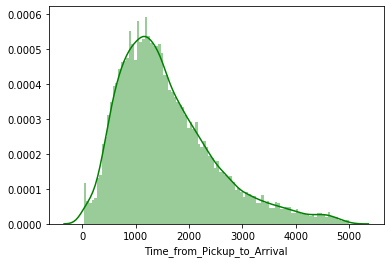

In [483]:
print(Train_df['Time_from_Pickup_to_Arrival'].describe())
plt.figure()
sns.distplot(Train_df['Time_from_Pickup_to_Arrival'], color='g', bins=100, hist_kws={'alpha': 0.4});

The above figure shows that the time from pick up to arrival is skewed to the right and there are outliers lying above approximately above 4000 seconds and below 20 seconds. Getting rid of the outliers will bring a normal or near dirstribution.

In [484]:
Train1_df=Train_df[Train_df['Time_from_Pickup_to_Arrival']<5000]

In [485]:
Train_df=Train1_df[Train1_df['Time_from_Pickup_to_Arrival']>20]

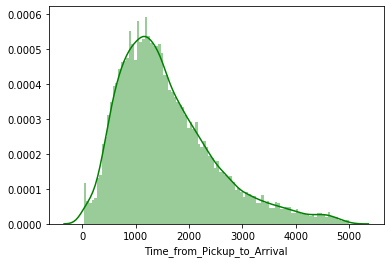

In [486]:
plt.figure()
sns.distplot(Train_df['Time_from_Pickup_to_Arrival'], color='g', bins=100, hist_kws={'alpha': 0.4});

Now that outliers are removed from the target viarable, the categorial data and numerical data features are analysed.

### Categorical data
The violin prot will show the distribution of Time_from_Pickup_to_Arrival across Platform_Type and Personal_or_Business. 

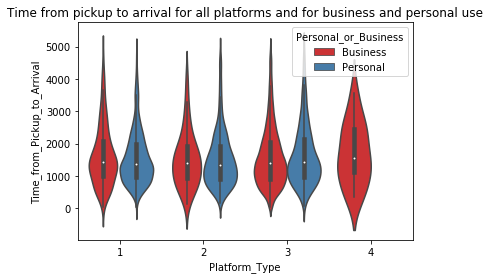

In [498]:
sns.violinplot(x="Platform_Type", y="Time_from_Pickup_to_Arrival", data=Train_df,hue='Personal_or_Business',palette='Set1')
plt.title('Time from pickup to arrival for all platforms and for business and personal use')
plt.show()

From the figure, the median and mode for all the platfroms and in both business and personal orders are around 1500. The figure also shows that plaform four only has business orders and a greater median compared to other platforms.

### Numerical data

__Placement and confirmation day of the month__

Placement and confirmation day of the month can be the same. If they are, it will save time that only one of the features is looked at. To check that, a new dataframe is created with rows that pass the condition that confirmation day is the same as placement day of the month.

In [62]:
New_df=Train_df[Train_df['Placement_Day_of_Month']!=Train_df['Confirmation_Day_of_Month']]
New_df

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,...,Age_y,Average_Rating_y,No_of_Ratings_y,Placement_to_Confiration_Time,Placement_to_Arrival_at_Pickup_Time,Placement_to_Pickup_Time,Confirmation_to_Arrival_at_Pickup_Time,Confirmation_to_Pickup_Time,Arrival_at_Pickup_to_Pickup_Time,Actual_Distance_KM
4024,Order_No_2800,User_Id_1402,3,Business,17,1,52477.0,18,2,47813.0,...,623,14.0,106,-4664.0,-2092.0,-1965.0,2572.0,-4664.0,-4664.0,6.0
9804,Order_No_3530,User_Id_2457,3,Business,11,2,44525.0,13,4,48450.0,...,752,14.3,322,3925.0,4233.0,5502.0,308.0,3925.0,3925.0,6.0


In [63]:
New_df=Train_df[Train_df['Placement_Weekday_(Mo_=_1)']!=Train_df['Confirmation_Weekday_(Mo_=_1)']]
New_df

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement_Day_of_Month,Placement_Weekday_(Mo_=_1),Placement_Time,Confirmation_Day_of_Month,Confirmation_Weekday_(Mo_=_1),Confirmation_Time,...,Age_y,Average_Rating_y,No_of_Ratings_y,Placement_to_Confiration_Time,Placement_to_Arrival_at_Pickup_Time,Placement_to_Pickup_Time,Confirmation_to_Arrival_at_Pickup_Time,Confirmation_to_Pickup_Time,Arrival_at_Pickup_to_Pickup_Time,Actual_Distance_KM
4024,Order_No_2800,User_Id_1402,3,Business,17,1,52477.0,18,2,47813.0,...,623,14.0,106,-4664.0,-2092.0,-1965.0,2572.0,-4664.0,-4664.0,6.0
9804,Order_No_3530,User_Id_2457,3,Business,11,2,44525.0,13,4,48450.0,...,752,14.3,322,3925.0,4233.0,5502.0,308.0,3925.0,3925.0,6.0


From this dataframe, it can be seen that it was only on two occasions where Placement - Day of Month and Placement - Weekday were not the same as Confirmation - Day of Month and Confirmation - Weekday.

This difference is viewed insignificant since it is only for 2 rows out of the 21201 rows. This makes sense if distribution for either of the features is checked instead of for both. The Placement - Day of Month is divided into fours bins with each representing a week as shown below.

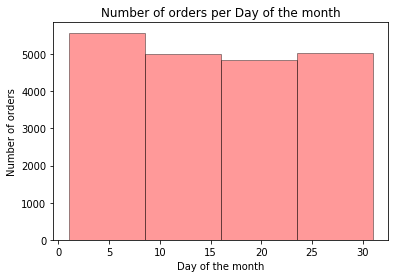

In [497]:
sns.distplot(Train_df['Placement_Day_of_Month'],bins=4,kde=False, color='red')
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel('Day of the month')
plt.ylabel('Number of orders')
plt.title('Number of orders per Day of the month')
plt.show()

From observation, there are a more orders in the first days of the month. This makes sense as these are the times when people usually get their salaries.

Looking at the Distance data, distane can show the range that contributes the most to the orders which simply is the distance range where the company gets most of its orders from. The distance (Km) is divided into 5 ranges and is shown below.

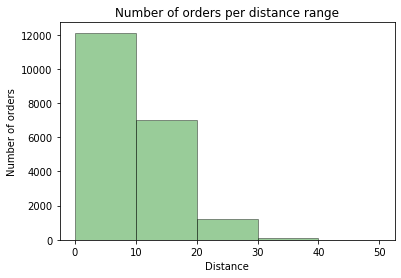

In [502]:
sns.distplot(Train_df['Distance_(KM)'], bins=np.arange(0,60,10),kde=False, color='green')
ax.set(xlabel='Distance(Km)', ylabel='Number of orders')
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel('Distance')
plt.ylabel('Number of orders')
plt.title('Number of orders per distance range')
plt.show()

The figure above shows that most of the orders are for a traveling distance of between zero and ten kilometres. Few orders are from a range 30 and 40. This means that people who stay close to the pickup place.

Now looking at both the temperature data and precipitation data, it was seen that these are the only features with missing values. Despite that, the graphs for both are produced and analysed.

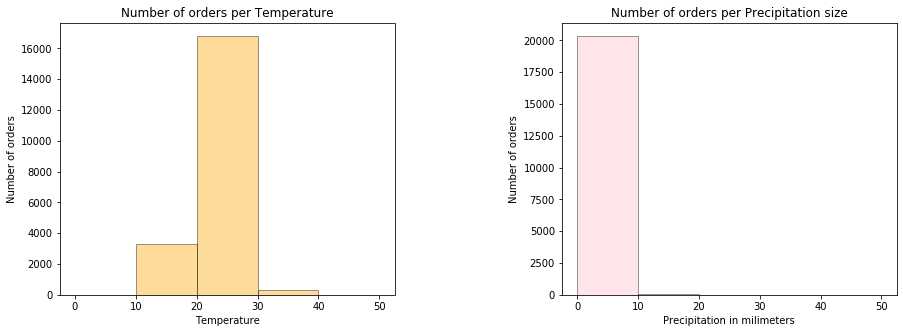

In [503]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))


sns.distplot(Train_df['Temperature'],ax=axes[0], bins=np.arange(0,60,10),kde=False, color='orange')
ax.set(xlabel='Temperature', ylabel='Number of orders')
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel('Distance')
plt.ylabel('Number of orders')

sns.distplot(Train_df['Precipitation_in_millimeters'],ax=axes[1], bins=np.arange(0,60,10),kde=False, color='pink')
ax.set(xlabel='Precipitation in millimeters', ylabel='Number of orders')
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel('Distance')
plt.ylabel('Number of orders')

axes[0].set(xlabel="Temperature", ylabel="Number of orders",title='Number of orders per Temperature')
axes[1].set(xlabel="Precipitation in milimeters", ylabel="Number of orders", title ='Number of orders per Precipitation size')
fig.subplots_adjust(wspace=0.5)
plt.show()

The figures above show that there are more orders for temperatures of between 20 and 30. The number of orders seem to decrease with the size of precipitation which can only mean it becomes impossible to make deliveries when it rains.

When it comes to the time it takes from pickup to arrival, a figure is produced below divded into categories of per 1000 seconds.

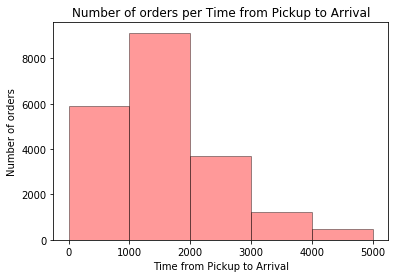

In [505]:
sns.distplot(Train_df['Time_from_Pickup_to_Arrival'],bins=np.arange(0,6000,1000),kde=False, color='red')
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Number of orders')
plt.title('Number of orders per Time from Pickup to Arrival')
plt.rcParams["patch.force_edgecolor"] = True
plt.show()

The graph above shows that most of the orders take between 1000 to 2000 seconds. As the time from arrival to pickup increases there is a dicrease of orders that were made.

Since the important features are looked at individually to see the number of orders per range and category of each feature, the distributions of all the numberical features are now looked at. For the purpose of labels being visible the distributions are divided into features with floats and ones with.

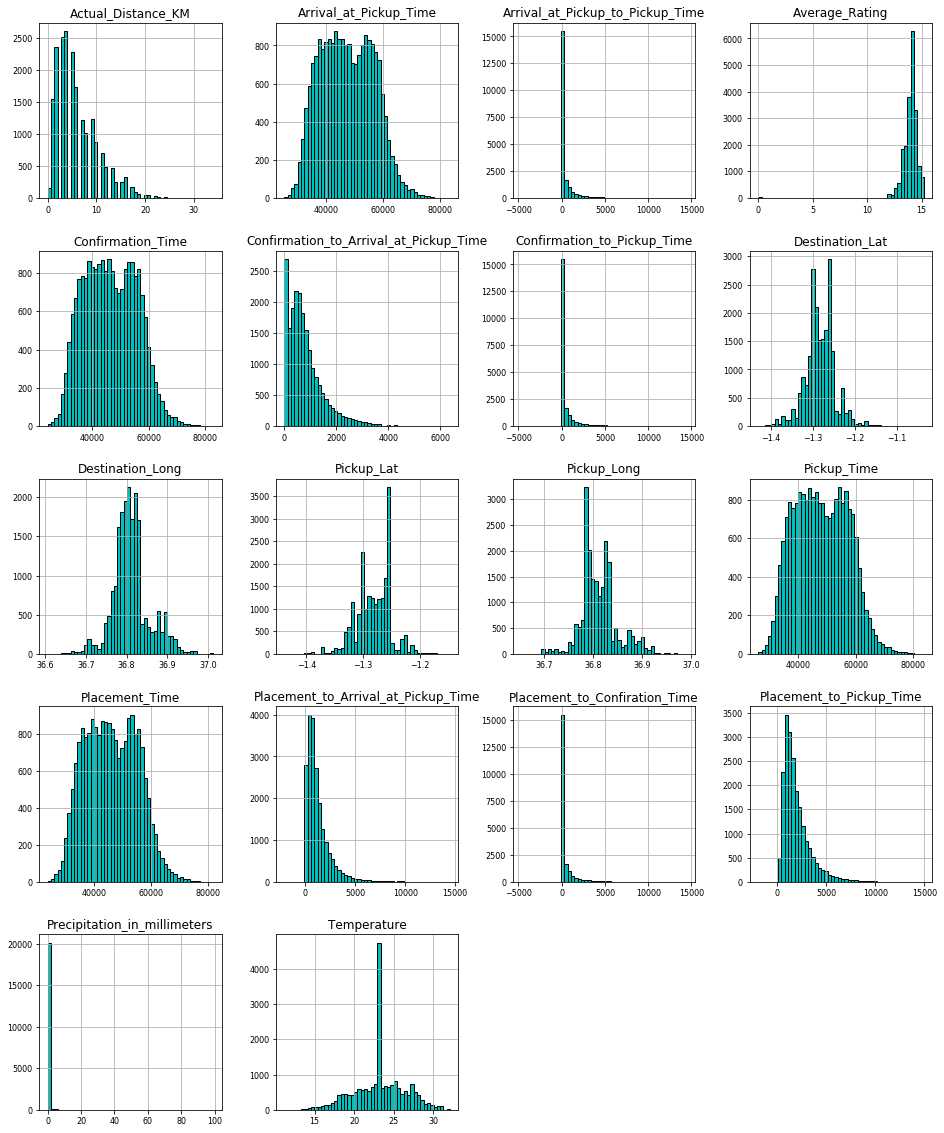

In [530]:
df_num = Train_df.select_dtypes(include = ['float64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='c')
plt.show()

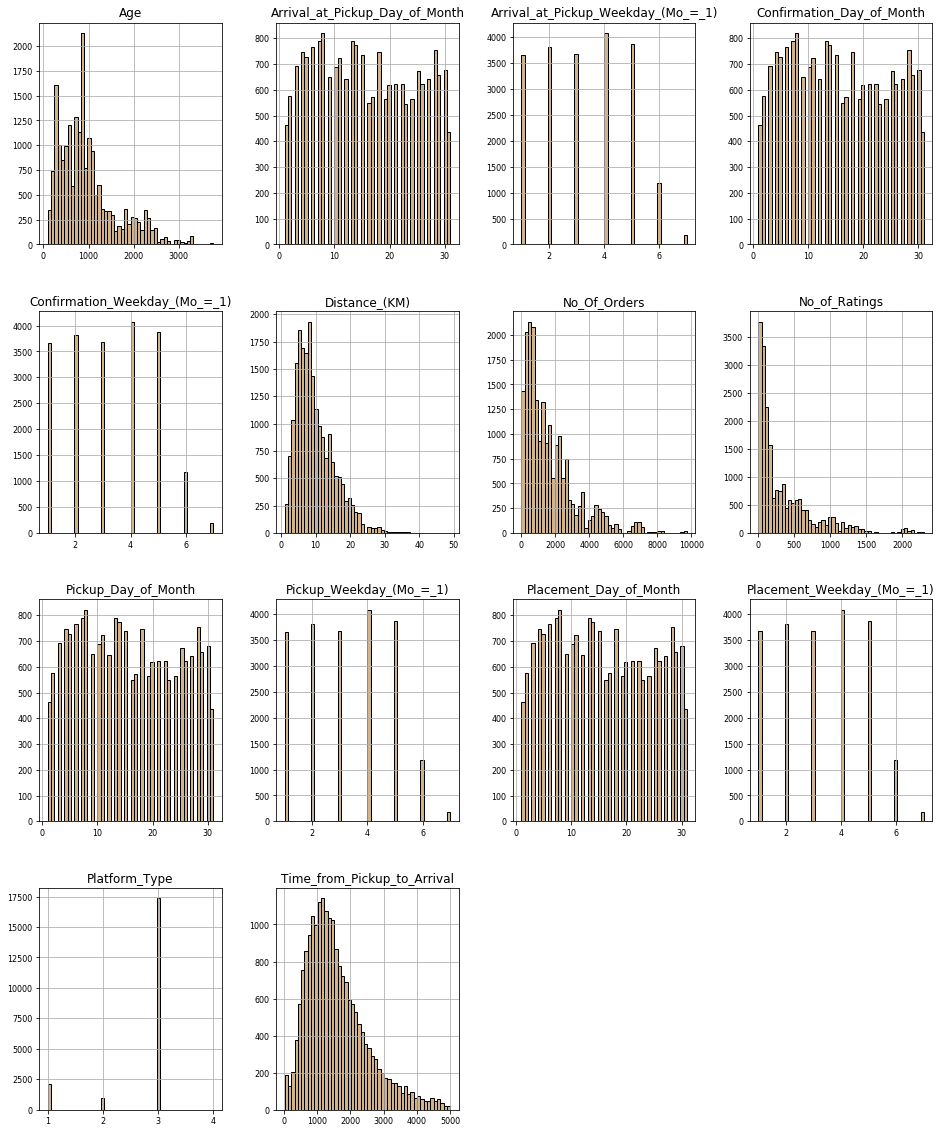

In [532]:
df_num = Train_df.select_dtypes(include = ['Int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='tan')
plt.show()


From the above distributions  Actual_Distance_KM, Placement_to_Pickup_Time, and Distance_(KM) show similar distribution as the target variable distribution. 

### Geography And Coordinates

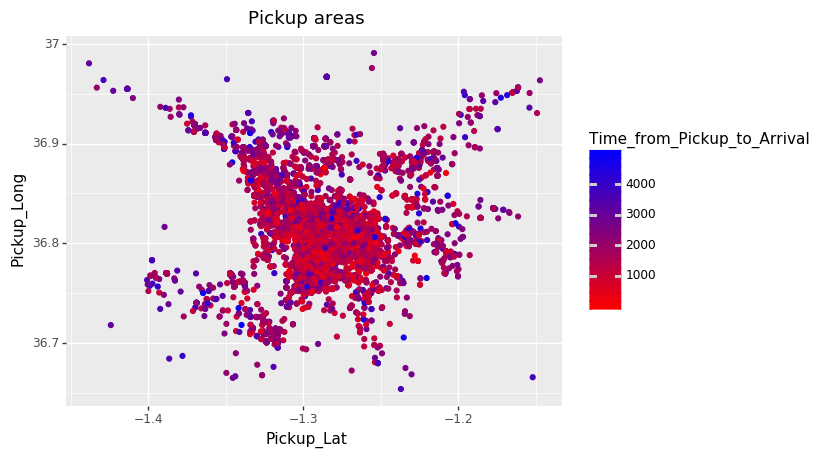

<ggplot: (38129951)>

In [546]:
color = sns.color_palette()
ggplot(aes(x='Pickup_Lat', y='Pickup_Long', color= 'Time_from_Pickup_to_Arrival'), data=Train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')+ggtitle('Pickup areas')

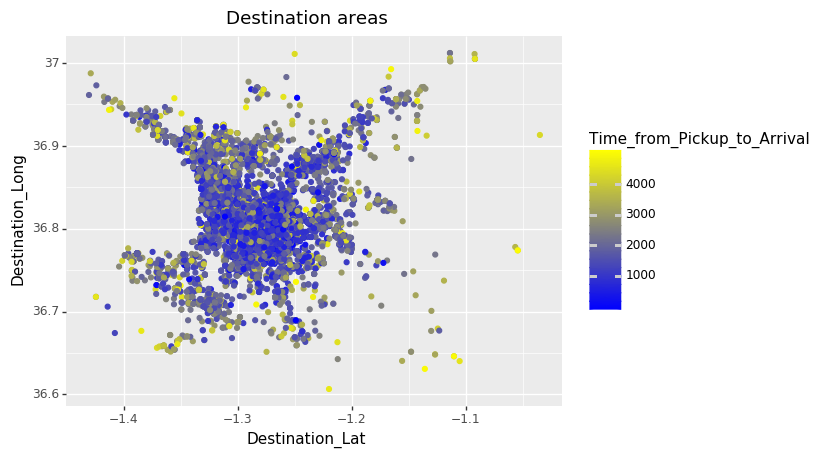

<ggplot: (38019129)>

In [543]:
ggplot(aes(x='Destination_Lat', y='Destination_Long', color= 'Time_from_Pickup_to_Arrival'), data=Train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'blue', high = 'yellow')+ ggtitle('Destination areas')

The distance of drop-offs are wider spread than pick up points, many destinations arrival time will be influenced by wider distances. It is also noticeable that lengthy times for deliveries occur in both the central and outlier destinations. Traffic congestion and distance are all influential in the pick to arrival time duration

## Variables and Variable Selection

### Summary Statistics

In this section, the data types and the summary statistics of the variables are explored.
Looking at the data types and number of entries of each column.

In [ ]:
Train_df.info()

The Train_df.info() specifically outputs the number of non-null entries in each column. As such,It can be certain that the data has missing values if columns have a varying number of non-null entries.

Below is the table showcasing the summary statistics of the data.

In [ ]:
Train_df.describe()

Based on the means and standard deviations of different columns, The data will be standardized.

### Dummy Variable Encoding

The User ID, Order_No and Rider Id features will be dropped because they do not influence the Time_from_Pickup_to_Arrival, but the Order No feature will not be dropped from Test_df as it is required for subbmision.

As it can be observed in the above table, the summary statistics being displayed is for numerical data at the moment. More importantly, all input data for regression model building purposes needs to be numerical. Therefore the text data Busines_or_Personal will be transformed  into numbers before training the machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, pandas method called get_dummie will be used. The text data is categorical variable, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [ ]:
#droping User_Id, Order_No and Rider Id  Features
Train_df = Train_df.drop(['Order_No', 'User_Id', 'Rider_Id'], axis = 1)
Test_df = Test_df.drop(['User_Id', 'Rider_Id'], axis = 1)

In [ ]:
Train_df.info()

In [ ]:
df_dummies = pd.get_dummies(Train_df)

In [ ]:
df_dummies = pd.get_dummies(Train_df, drop_first=True)

# Making sure that all the column names have correct format
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("(Mo_=_1)","Mo_1") for col in df_dummies.columns]
df_dummies.columns = [col.replace("(KM)","KM") for col in df_dummies.columns]
# Test_df
Test_df.columns = [col.replace(" ", "_") for col in Test_df.columns]
Test_df.columns = [col.replace("(Mo_=_1)","Mo_1") for col in Test_df.columns]
Test_df.columns = [col.replace("(KM)","KM") for col in Test_df.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

In [ ]:
df_dummies.shape

### Correlations and Model Structure

Using the dummy variable dataframe, a model that predictsTime from Pickup to Arrival (the dependent variable) as a function of 33 different independent variables (IVs) can be build.

Before this can be done, however, its better to reorder columns so that the dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of the data easier to interpret.

In [ ]:
column_titles = [col for col in df_dummies.columns if col!= 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
df_dummies=df_dummies.reindex(columns=column_titles)

In [ ]:
df_dummies.corr()

In [ ]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

If all of these variables are to be used, it would be like effectively working with more than enough information. The model will also have collinearity issues:

Peronal_or_Business_Personal and peronal_or_Business_Business are perfectly negative correlated. All the features having blue squeres are also perfectly negative correlated.
This will likely be a problem when building a model.

 checking what an OLS model summary says.

## lasso

In [ ]:
df= df_dummies.copy()

In [ ]:
df.shape

### Preprocessing¶

Standardizing the data before it can be used in our LASSO model.

In [ ]:
# separaing the features from the response
X = df.drop('Time_from_Pickup_to_Arrival', axis=1)
y = df['Time_from_Pickup_to_Arrival']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# create standardization object
scaler = StandardScaler()

In [ ]:
# save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [ ]:
# spliting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)


In [ ]:
# importing LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# train the LASSO model
lasso.fit(X_train, y_train)

In [ ]:
# extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# extracting coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# extracting intercept
print("Intercept:", float(intercept))

In [ ]:
coeff   

### Assessment of predictive accuracy

Again, we'll make use of the sklearn.metrics library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors;
- A least squares model using the predictors with non-zero coefficients from LASSO;
- A ridge regression model using all available predictors.

In [ ]:
# fitting a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

X_subset = df.drop(['Pickup_Day_of_Month', 
                    'Confirmation_Day_of_Month', 
                    'Arrival_at_Pickup_Day_of_Month'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset,
                                                        y,
                                                        test_size=0.20,
                                                        random_state=1,
                                                        shuffle=False)

# least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# least squares using all predictors
lm_all = LinearRegression()

# ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

In [ ]:
# making training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [ ]:
# making test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [ ]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [ ]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [ ]:
# view the results
results_df

In [ ]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

In [ ]:
plt.plot(np.arange(96,120), lasso.predict(X_test), label='LASSO')
plt.plot(np.arange(96,120), ridge.predict(X_test), label='Ridge')
plt.plot(np.arange(96,120), lm_all.predict(X_test), label='Least Squares')
plt.plot(np.arange(96,120), y_test, label='Testing')
plt.legend()

plt.show()

## Fitting the model using statsmodels.OLS

#### Generating the regression string
Following the process initially detailed in the Multiple Linear Regression Pt 2 - Checking Model Quality train, OLS model will be build and the model summary will be printed:

y ~ X

which is read as follows: "Regress y on X". statsmodels works in a similar way, so an appropriate string need to be generated to feed to the method in case it is required to fit the model.

In [ ]:
# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'Time_from_Pickup_to_Arrival'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

In [ ]:
# Fitting the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

There is warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables (It was noticed earlier that Peronal_or_Business_Personal and peronal_or_Business_Business are perfectly negative correlated).

In order to ensure an underlying relationship between the categories is not assumed, pd.get_dummies is called with the argument drop_first=True so that only  n-1 columns are create for each variable with n categories.

In [ ]:
df_dummies = pd.get_dummies(Train_df, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("(Mo_=_1)","Mo_1") for col in df_dummies.columns]
df_dummies.columns = [col.replace("(KM)","KM") for col in df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Time_from_Pickup_to_Arrival'] + ['Time_from_Pickup_to_Arrival']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

In [ ]:
df_dummies.shape

Now there are 28 columns instead of 39. This gives for 28 potential independent variables that could be used to build a relationship on Time_from_Pickup_to_Arrival

Checking what the OLS model summary would say if now only the 30 variable columns are fit

In [ ]:
# The model DataFrame will be kept, but only specify the columns wanted to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

The condition number has improved, but there is still mention of strong multicollinearity in warning [2]

Making further selections on the variables now using their significance.



## Variable Selection by Correlation and Significance

now there are 30 predictor variables to choose from, a way of guiding is needed to choose the best ones to be predictors. One way is to look at the correlations between the Time_from_Pickup_to_Arrival and each variables in the DataFrame and select those with the strongest correlations (both positive and negative).

To consider how significant those features are.
The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [ ]:
# Calculating correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

In [ ]:

# a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time_from_Pickup_to_Arrival']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Time_from_Pickup_to_Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

Above is the sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If a logic test was to be used with a significance value of 5% (p-value < 0.05),it would imply that all but the last two features from above statistically significant

the variables that have a significant correlation with the dependent variable are kept.they will be put into an independent variable DataFrame X

In [ ]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Time_from_Pickup_to_Arrival'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

To avoid autocorrelation,it is needed to look for predictor variable pairs which have a high correlation with each other.

In [ ]:
# Creating the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [ ]:
# just like before, the correlation matrix is created
# rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# The interest is in the off diagonal entries:
off_diagonal = np.where(r != c)

# Showing the correlation matrix rows and columns where there is  highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

Okay, so it looks like six of the features are very highly correlated.

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Distance is slightly better correlated (and lower p-value) to the dependent variable
there fore; Arrival_at_Pickip_day_of_Month, Pickup_Day_of_Month, Confirmation_Day_of_Month and Placement_Day_of_Month are dropped form the feature dataframe. 
The resulting OLS fit summary:

In [ ]:
# a new subset of potential independent variables
X_remove = ['Pickup_Day_of_Month']
X_corr_names = [col for col in X_names if col not in X_remove]

# Creating new OLS formula based-upon the smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

### Variable Selection by Variance Thresholds

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

It is important to note that variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [ ]:
# Separating data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [ ]:
# Normalizing data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

### Variance Threshold in Scikit Learn

To implement Variance Threshold in Scikit Learn:

Import and create an instance of the VarianceThreshold class;
Using the .fit() method to select subset of features based on the threshold.

In [ ]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Using the object to apply the threshold on data
selector.fit(X_normalize)

The Variance Threshold has been applied to the data.Now a closer look at the calculated variance for each predictive variable.

In [ ]:
# Getting column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

The above table shows the variances of the individual columns before any threshold is applied. It allows anyone to revise  initial variance threshold if there might be a need to exclude important variables.

The results needs to be extracted and used to select new columns - which form a subset of all the columns.

In [ ]:
# Selecting new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Saving variable names for later
X_var_names = X_new.columns

# Viewing first few entries
X_new.head()

In [ ]:
X_new.shape

With a threshold of 0.03, the predictor number has gone down to 12 predictors.

Trying few more few more thresholds

In [ ]:
# Creating Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [ ]:
selector_1.fit(X_normalize)

In [ ]:
selector_2.fit(X_normalize)

for selector_3.fit(X_normalize), there is no feature in X meets the variance threshold 0.15000

In [ ]:
selector_3.fit(X_normalize)

In [ ]:
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

 graphing the number of predictors by the thresholds to investigate the relationship

In [ ]:
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

an increase the threshold, the number of dimensions decrease

checking what the resulting OLS fit summary for a threshold of 0.03 says:

In [ ]:
# new OLS formula
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fitting the model using the model dataframe
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

print(fitted.summary())

### modelling the y variable¶
Now that the DataFrame has been shortened using various methods, Its time to see if  linear regression models can be fit and compare them

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Preprocess data
Assuring that all models are trained and tested on the same data.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [ ]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [ ]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

Fitting models
instantiate and fit the models

In [ ]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

Assessing model accuracy
checking how the linear models performed!

In [ ]:
# Creating figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Creating list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

comment.........

## Building Machine Learning Models

Time_from_Pickup_to_Arrival ~ Distance_KM + Actual_Distance_KM + Confirmation_to_Arrival_at_Pickup_Time + Placement_to_Arrival_at_Pickup_Time + Destination_Long + Placement_to_Pickup_Time + Pickup_Long + Arrival_at_Pickup_to_Pickup_Time + Confirmation_to_Pickup_Time + Placement_to_Confiration_Time + Arrival_at_Pickup_Time + Arrival_at_Pickup_Day_of_Month + Confirmation_Day_of_Month + Placement_Day_of_Month + No_Of_Orders + Average_Rating + Pickup_Lat + Destination_Lat

In [ ]:
Train_df.columns = [col.replace(" ", "_") for col in Train_df.columns]
Train_df.columns = [col.replace("(Mo_=_1)","Mo_1") for col in Train_df.columns]
Train_df.columns = [col.replace("(KM)","KM") for col in Train_df.columns]
# Test_df
Test_df.columns = [col.replace(" ", "_") for col in Test_df.columns]
Test_df.columns = [col.replace("(Mo_=_1)","Mo_1") for col in Test_df.columns]
Test_df.columns = [col.replace("(KM)","KM") for col in Test_df.columns]

In [ ]:
train_df = Train_df.drop(['Personal_or_Business', 'No_of_Ratings',
                          'Age','Temperature',
                          'Platform_Type', "Placement_Weekday_Mo_1", 
                          'Placement_Time','Precipitation_in_millimeters', 
                         'Confirmation_Weekday_Mo_1',
                         'Confirmation_Time', 
                         "Arrival_at_Pickup_Weekday_Mo_1",
                         'Arrival_at_Pickup_Time',
                         'Pickup_Weekday_Mo_1', 'Pickup_Time'], axis =1)

test_df = Test_df.drop(['Personal_or_Business', 'No_of_Ratings',
                        'Age','Temperature',
                         'Platform_Type', "Placement_Weekday_Mo_1", 
                          'Placement_Time','Precipitation_in_millimeters', 
                         "Confirmation_Weekday_Mo_1",
                         'Confirmation_Time', 
                         "Arrival_at_Pickup_Weekday_Mo_1",
                         'Arrival_at_Pickup_Time',
                         "Pickup_Weekday_Mo_1", 'Pickup_Time'],axis = 1)

In [ ]:
train_df

In [ ]:
X_train = train_df.drop("Time_from_Pickup_to_Arrival", axis=1)
Y_train = train_df["Time_from_Pickup_to_Arrival"]
X_test  = test_df.drop("Order_No", axis=1).copy()

In [ ]:
Y_train = Y_train.flatten()

In [ ]:
Y_train.values.flatten()

In [ ]:
Y_train.shape

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Stochastic Gradient Descent (SGD):

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest:

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Linear Support Vector Machine:

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)